In [ ]:
ls

sample_data/


In [ ]:
from google.colab import files
uploaded = files.upload()

Saving facebook_ads.csv to facebook_ads.csv


In [ ]:
import io
import pandas as pd

df = pd.read_csv(io.BytesIO(uploaded['facebook_ads.csv']))


**Description of Data**

1. **ad_id** : unique ID for each ad.
2. **xyz_campaign_id** : an ID associated with each ad campaign of XYZ company.
3. **fb_campaign_id** : an ID associated with how Facebook tracks each campaign.
4. **age** : age of the person to whom the ad is shown.
5. **gender** : gender of the person to whom the add is shown
6. **interest** : a code specifying the category to which the persons interest belongs.
7. **Impressions** : the number of times the ad was shown.
8. **Clicks** : number of clicks on for that ad.
9. **Spent** : Amount paid by company xyz to Facebook, to show that ad.
10. **Total conversion** : Total number of people who enquired about the product after seeing the ad.
11. **Approved conversion** : Total number of people who bought the product after seeing the ad.

In [ ]:
df.head()

,ad_id,xyz_campaign_id,fb_campaign_id,age,gender,interest,Impressions,Clicks,Spent,Total_Conversion,Approved_Conversion
0,708746,916,103916,30-34,M,15,7350,1,1.43,2,1
1,708749,916,103917,30-34,M,16,17861,2,1.82,2,0
2,708771,916,103920,30-34,M,20,693,0,0.00,1,0
3,708815,916,103928,30-34,M,28,4259,1,1.25,1,0
4,708818,916,103928,30-34,M,28,4133,1,1.29,1,1


**Creating features relevant for ad analysis**

The following variables are common metrics used in ad analysis and will be added to the dataset:

1. Click-through-rate (CTR), which is the percentage of how many impressions became clicks. A high CTR (2 percent as benchmark) is indicative of adverts being well recieved by a relevant audience. A low CTR suggests either both or one of these factors has not been achieved.
2. Conversion Rate (CR), is the percentage of clicks that result in a conversion, as defined by the campaign objectives (i.e. sale, contact form completed, downloading an e-book or spending more than a certain time viewing the website).
3. Cost Per Click (CPC), on average. This must be considered in combination with other variables (i.e. CR).
4. Cost Per Conversion, which combines the CPC and CR metrics.
Conversion Value, which is how much each conversion is worth. The target conversion value will depend on what the definition of the conversion is and how this is related to revenue returned for example, when maximising revenue is the business aim.
5. Return on Advertising Spend (ROAS), which is the revenue returned as a percentage of the advertising spend.
6. Cost Per Mille (CPM), which is the cost of one thousand impressions (useful metric when considering brand awareness as business performance metric).
The first features to create are CTR and CPC.

In [ ]:
# The first features to create are CTR and CPC.

df['CTR'] = (df['Clicks']/df['Impressions']*100)
df['CPC'] = df['Spent']/df['Clicks']
df.head()

,ad_id,xyz_campaign_id,fb_campaign_id,age,gender,interest,Impressions,Clicks,Spent,Total_Conversion,Approved_Conversion,CTR,CPC
0,708746,916,103916,30-34,M,15,7350,1,1.43,2,1,0.013605,1.43
1,708749,916,103917,30-34,M,16,17861,2,1.82,2,0,0.011198,0.91
2,708771,916,103920,30-34,M,20,693,0,0.00,1,0,0.000000,NaN
3,708815,916,103928,30-34,M,28,4259,1,1.25,1,0,0.023480,1.25
4,708818,916,103928,30-34,M,28,4133,1,1.29,1,1,0.024195,1.29


To get an initial idea of how the variables are related, look at the correlation between the following. The result is shown in Figure 1.



In [ ]:
subset_df = df[['CTR', 'CPC', 'Approved_Conversion', 'Total_Conversion', 'Impressions', 'Spent', 'Clicks']].copy()

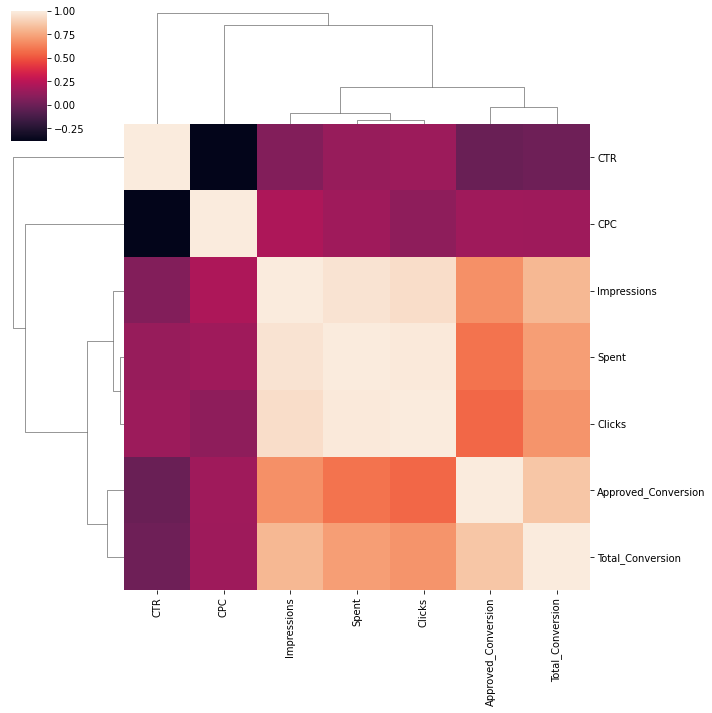

In [ ]:
import seaborn as sns

p1 = sns.clustermap(subset_df.corr())


To look at the correlation numerically can also do the following.



In [ ]:
corr = subset_df.corr(method='pearson')
corr

,CTR,CPC,Approved_Conversion,Total_Conversion,Impressions,Spent,Clicks
CTR,1.000000,-0.378854,-0.006602,0.010721,0.075914,0.140952,0.159290
CPC,-0.378854,1.000000,0.170040,0.160828,0.208556,0.165464,0.112676
Approved_Conversion,-0.006602,0.170040,1.000000,0.864034,0.684249,0.593178,0.559526
Total_Conversion,0.010721,0.160828,0.864034,1.000000,0.812838,0.725379,0.694632
Impressions,0.075914,0.208556,0.684249,0.812838,1.000000,0.970386,0.948514
Spent,0.140952,0.165464,0.593178,0.725379,0.970386,1.000000,0.992906
Clicks,0.159290,0.112676,0.559526,0.694632,0.948514,0.992906,1.000000


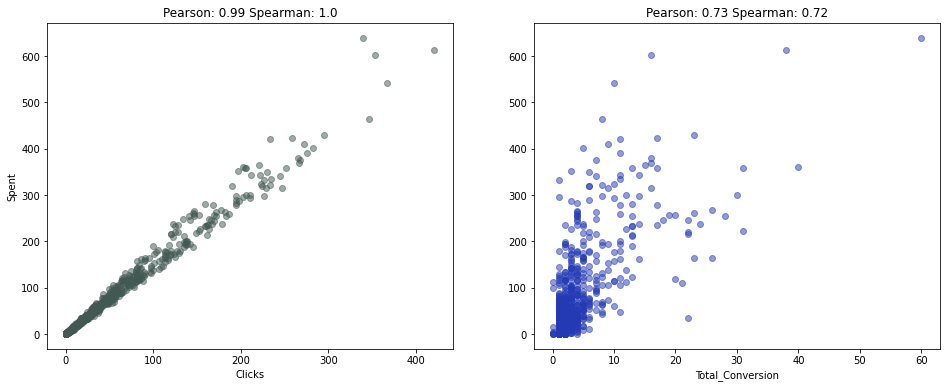

In [ ]:
import matplotlib. pyplot as plt

plt.rcParams['figure.figsize'] = [16, 6]

fig, ax = plt.subplots(nrows=1, ncols=2)

ax=ax.flatten()

cols = ['Clicks','Total_Conversion']
colors=['#415952', '#243AB5']
j=0

for i in ax:
    if j==0:
        i.set_ylabel('Spent')
    i.scatter(subset_df[cols[j]], subset_df['Spent'],  alpha=0.5, color=colors[j])
    i.set_xlabel(cols[j])
    i.set_title('Pearson: %s'%subset_df.corr().loc[cols[j]]['Spent'].round(2)+' Spearman: %s'%subset_df.corr(method='spearman').loc[cols[j]]['Spent'].round(2))
    j+=1

plt.show()

It is reassuring that the higher the spend, the more clicks and although less reliably, the more conversions. However, in order to be able to provide an improvement in the desired business performance, in this case maximising revenue, actionable insights have to be obtained. The data is broken down into different campaigns, which will need to be analysed in turn.

![alt text](https://www.cedwards.info/img/figuresfacebookeda/plot3.png)

Figure shows campaign 1178 has the biggest spend, so this is the one that will be focussed on further.



# **Looking at specific campaigns**


In [ ]:
cam_df_1178 = df[df['xyz_campaign_id']==1178]
cam_df_1178.head()

,ad_id,xyz_campaign_id,fb_campaign_id,age,gender,interest,Impressions,Clicks,Spent,Total_Conversion,Approved_Conversion,CTR,CPC
518,1121091,1178,144531,30-34,M,10,1194718,141,254.049996,28,14,0.011802,1.801773
519,1121092,1178,144531,30-34,M,10,637648,67,122.400000,13,5,0.010507,1.826866
520,1121094,1178,144531,30-34,M,10,24362,0,0.000000,1,1,0.000000,NaN
521,1121095,1178,144531,30-34,M,10,459690,50,86.330001,5,2,0.010877,1.726600
522,1121096,1178,144531,30-34,M,10,750060,86,161.909999,11,2,0.011466,1.882674


**Missing data**

The amount of missing data was checked, as shown in the table below which shows the percentage of missing data for each variable. Missing values are only present for the CPC variable, where clicks and spent equal 0, returning NAN.

In [ ]:
columns = cam_df_1178.columns
percentage_missing = cam_df_1178.isnull().sum() * 100 / len(cam_df_1178)
table_percentage_missing = pd.DataFrame({'column_name': columns,
                                 'percentage_missing': percentage_missing})

table_percentage_missing

,column_name,percentage_missing
ad_id,ad_id,0.00
xyz_campaign_id,xyz_campaign_id,0.00
fb_campaign_id,fb_campaign_id,0.00
age,age,0.00
gender,gender,0.00
interest,interest,0.00
Impressions,Impressions,0.00
Clicks,Clicks,0.00
Spent,Spent,0.00
Total_Conversion,Total_Conversion,0.00


# **Distributions among different demographics**


Figure shows basic count distributions for gender and age subgroups. There is no overwhelming unbalanced contributions to these subgroups.

![alt text](https://www.cedwards.info/img/figuresfacebookeda/plot4.png)

# Further feature engineering

When the business aim is to maximise revenue for advertising expenditure, the ROAS metric is very useful. However, this requires the monetary amounts from conversions (Total_conversion) and sales (Approved_conversion) be known. In the following it is a assumed the former is worth $5 and the later $$100. Using this the other metrics were calculated and the resulting dataframe head shown below.

**ROAS:** Return On Advertising Spend. A marketing metric that measures the efficacy of a digital advertising campaign. ROAS helps online businesses evaluate which methods are working and how they can improve future advertising efforts.

**CPM:** Cost per thousand, also called cost per mille, is a marketing term used to denote the price of 1,000 advertisement impressions on one webpage. If a website publisher charges $2.00 CPM, that means an advertiser must pay $2.00 for every 1,000 impressions of its ad.


In [ ]:
cam_df_1178['totConv'] = cam_df_1178.loc[:,'Total_Conversion'] + cam_df_1178.loc[:,'Approved_Conversion']
cam_df_1178['conVal'] = cam_df_1178['Total_Conversion']*5
cam_df_1178['appConVal'] = cam_df_1178['Approved_Conversion'] * 100
cam_df_1178['totConvVal'] = cam_df_1178['conVal'] + cam_df_1178['appConVal']
cam_df_1178['costPerCon'] = round(cam_df_1178['Spent'] / cam_df_1178['totConv'], 2)
cam_df_1178['ROAS'] = round(cam_df_1178['totConvVal'] / cam_df_1178['Spent'], 2)
cam_df_1178['CPM'] = round((cam_df_1178['Spent'] / cam_df_1178['Impressions']) * 1000, 2)
df5 = cam_df_1178.head()
df5

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documen

,ad_id,xyz_campaign_id,fb_campaign_id,age,gender,interest,Impressions,Clicks,Spent,Total_Conversion,Approved_Conversion,CTR,CPC,totConv,conVal,appConVal,totConvVal,costPerCon,ROAS,CPM
518,1121091,1178,144531,30-34,M,10,1194718,141,254.049996,28,14,0.011802,1.801773,42,140,1400,1540,6.05,6.06,0.21
519,1121092,1178,144531,30-34,M,10,637648,67,122.400000,13,5,0.010507,1.826866,18,65,500,565,6.80,4.62,0.19
520,1121094,1178,144531,30-34,M,10,24362,0,0.000000,1,1,0.000000,NaN,2,5,100,105,0.00,inf,0.00
521,1121095,1178,144531,30-34,M,10,459690,50,86.330001,5,2,0.010877,1.726600,7,25,200,225,12.33,2.61,0.19
522,1121096,1178,144531,30-34,M,10,750060,86,161.909999,11,2,0.011466,1.882674,13,55,200,255,12.45,1.57,0.22


ROAS of infinity occurs when there are 0 clicks but a conversion. This may have happened because the click wasn't tracked or it occurred at a different time and has been attributed elsewhere. Convert these values to NAN and check for missing data.



In [ ]:
columns_df5 = df5.columns
percentage_missing_df5 = df5.isnull().sum() * 100 / len(df5)
table_percentage_missing_df5 = pd.DataFrame({'column_name': columns_df5,
                                 'percentage_missing': percentage_missing_df5})

table_percentage_missing_df5

,column_name,percentage_missing
ad_id,ad_id,0.0
xyz_campaign_id,xyz_campaign_id,0.0
fb_campaign_id,fb_campaign_id,0.0
age,age,0.0
gender,gender,0.0
interest,interest,0.0
Impressions,Impressions,0.0
Clicks,Clicks,0.0
Spent,Spent,0.0
Total_Conversion,Total_Conversion,0.0


# Analysis by age, gender and interest

In order to improve a similar campaign with a view to maximising revenue return, the variables available in the dataset (in this case age, gender and interest) can be investigated further with respect to the ROAS metric.



# Analysis by gender

![alt text](https://www.cedwards.info/img/figuresfacebookeda/plot5.png)